In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트 가져오기
from matplotlib import rc
rc('font', family='NanumGothic')

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
%config inlineBackend.figure_format = 'retina' #선명하게 만들기

### 데이터 불러오기

In [44]:
df = pd.read_csv('./data/SeoulBikeData_NaN.csv')
df.drop('Unnamed: 0', axis=1, inplace=True) #잘못 들어온 데이터 삭제 후 진행
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### head, tail, info, 결측치, describe, 문자형의 value_counts

In [45]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [46]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            7884 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           7884 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    7884 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [48]:
df.isna().sum() #Temperature(°C), Wind speed (m/s), Seasons에 결측치 존재 => Seasons는 Date를 이용해 결측치 대체 가능
#Temperature(°C), Wind speed (m/s)는 데이터가 시간순으로 되어있음을 고려해 직전 데이터와 직후 값의 평균으로 대체 가능 할 것으로 생각

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              876
Humidity(%)                    0
Wind speed (m/s)             876
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      876
Holiday                        0
Functioning Day                0
dtype: int64

In [49]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,7884.000000,8760.000000,7884.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,13.026370,58.226256,1.727220,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.936017,20.362413,1.036138,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.600000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.950000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.600000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [50]:
print(df['Seasons'].value_counts(dropna=False))
print(df['Holiday'].value_counts())
print(df['Functioning Day'].value_counts())

Spring    1990
Summer    1990
Autumn    1969
Winter    1935
NaN        876
Name: Seasons, dtype: int64
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Yes    8465
No      295
Name: Functioning Day, dtype: int64


### Date, Hour 변수 확인

In [51]:
(list(range(24)) * 365 == df.Hour).value_counts() #시간이 순서대로 돼있음을 확인

True    8760
Name: Hour, dtype: int64

In [52]:
df['Date'] = pd.to_datetime(df['Date'],format = "%d/%m/%Y" ) #Date를 날짜형식으로 변환
print((df.iloc[-1,0]-df.iloc[0,0]).days +1)
df.shape[0]/24 #날짜가 연속적인지 확인, (마지막날-첫날)과 행 수 비교 => 연속적이라고 판단 가능 => 결측치 대체에 이용


365


365.0

### 결측치 저리

> Seasons의 결측치 처리

In [53]:
#Seasons의 결측치 처리: 앞서 Date와 Hour를 통해 확인한 시계열 데이터라는 것을 이용해 결측치 처리
#전후 행의 Seasons를 확인하고 둘이 같으면 그 값으로 대체, 그렇지 않으면 결측치 그대로
df['Seasons'] = np.where(df['Seasons'].ffill() == df['Seasons'].bfill(), df['Seasons'].ffill(), np.nan)
print(df['Seasons'].isna().sum())
df[df['Seasons'].isna()] #남은 결측치 확인

1


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes


In [54]:
#남은 결측치가 첫행인 것을 확인하고 같은날인 다음행 값으로 대체함
df['Seasons'][0] = df['Seasons'][1]
print(df['Seasons'].isna().sum())

0


> Temperature(°C), Wind speed (m/s)의 결측치 처리

In [55]:
#Temperature(°C), Wind speed (m/s)는 전후 값의 평균으로 대체
df['Temperature(°C)'] = df['Temperature(°C)'].fillna((df['Temperature(°C)'].shift() + df['Temperature(°C)'].shift(-1)) / 2)
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna((df['Wind speed (m/s)'].shift() + df['Wind speed (m/s)'].shift(-1)) / 2)
print(df[['Temperature(°C)', 'Wind speed (m/s)']].isna().sum()) #여전히 결측치가 남아있음 => 결측치가 연속해서 있는 경우가 존재함


Temperature(°C)     171
Wind speed (m/s)    193
dtype: int64


In [56]:
#rolling 메서드를 이용해 이동평균으로 결측치 대체
window_size = 5
df['Temperature(°C)'] = df['Temperature(°C)'].fillna(df['Temperature(°C)'].rolling(window=window_size, min_periods=1, center=True).mean())
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].rolling(window=window_size, min_periods=1, center=True).mean())
print(df[['Temperature(°C)', 'Wind speed (m/s)']].isna().sum()) #결측치 처리 완료

Temperature(°C)     0
Wind speed (m/s)    0
dtype: int64


In [57]:
df.isna().sum().sum() #결측치 처리 완료

0

### 상관계수 확인

Text(0.5, 1.0, 'correlation heatmap')

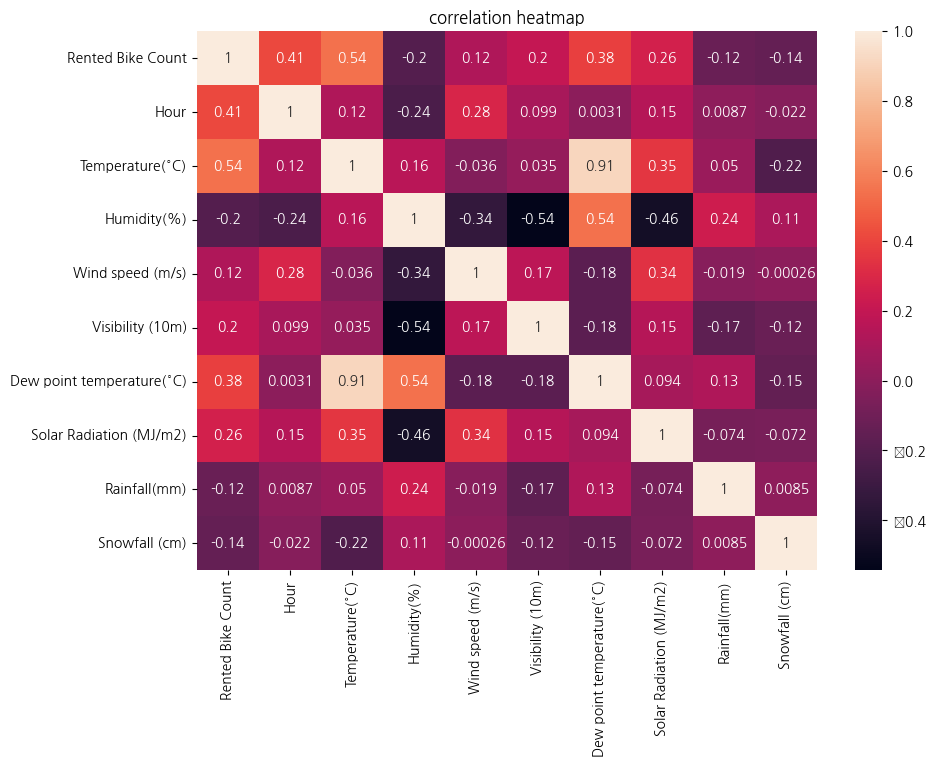

In [58]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot = True)
plt.title('correlation heatmap')

> 상관계수가 높은 값들만 확인

Text(0.5, 1.0, 'correlation heatmap(abs(corr)>0.45)')

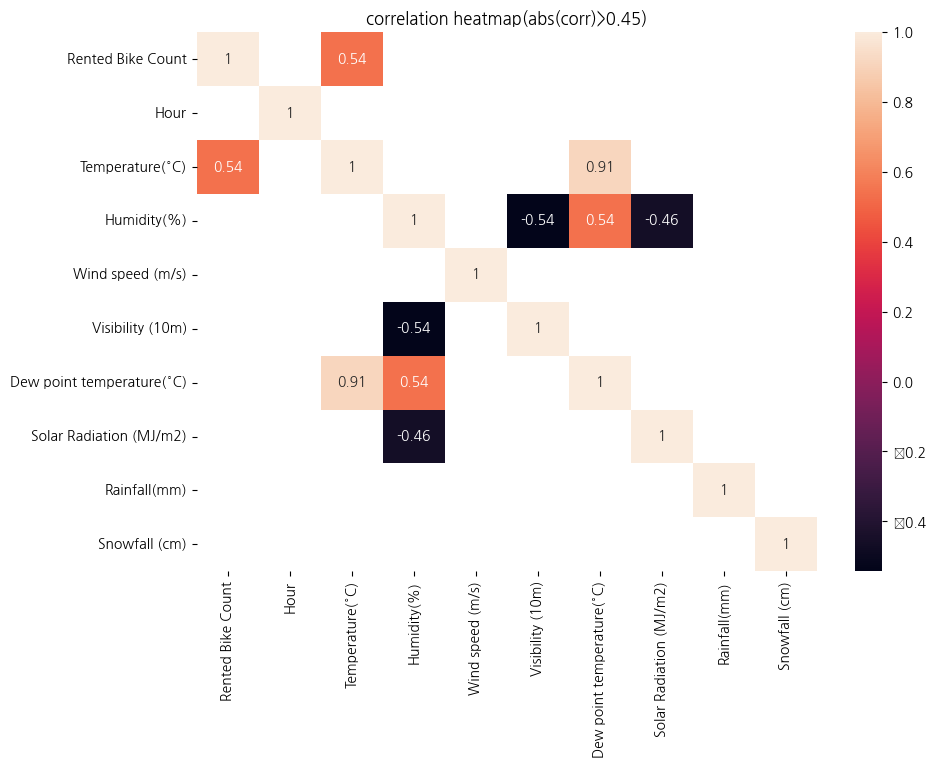

In [59]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr()[0.45<df.corr().abs()],annot = True)
plt.title('correlation heatmap(abs(corr)>0.45)')

### Seasons, Holiday, Functioning Day 변수 확인

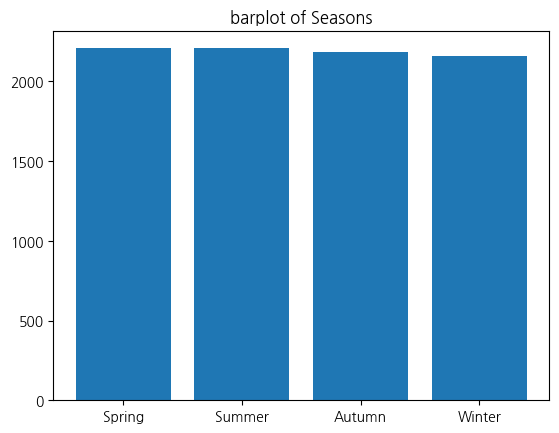

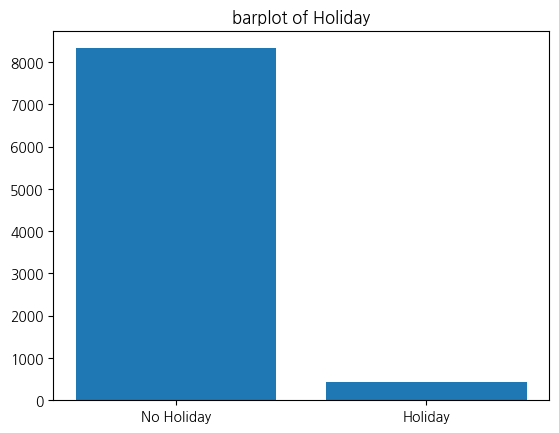

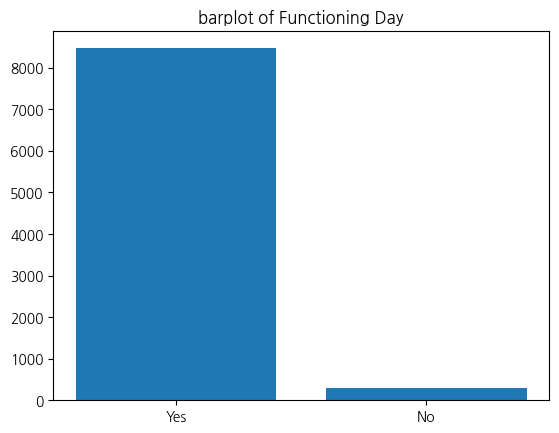

In [60]:
Seasons_counts = df['Seasons'].value_counts()
plt.bar(Seasons_counts.index,Seasons_counts)
plt.title('barplot of Seasons')
plt.show() #1년이기에 계절분포는 거의 비슷
Holiday_counts = df['Holiday'].value_counts()
plt.bar(Holiday_counts.index,Holiday_counts)
plt.title('barplot of Holiday')
plt.show()
FuncDay_counts = df['Functioning Day'].value_counts()
plt.bar(FuncDay_counts.index,FuncDay_counts)
plt.title('barplot of Functioning Day')
plt.show()


> Holiday인 날

In [61]:
Holiday_Date = df[df['Holiday']=='Holiday']['Date'].unique()
print('length of Holiday Date: ',len(Holiday_Date))
print(Holiday_Date)
df[df['Date'].isin(Holiday_Date)]

length of Holiday Date:  18
['2017-12-22T00:00:00.000000000' '2017-12-24T00:00:00.000000000'
 '2017-12-25T00:00:00.000000000' '2017-12-31T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2018-02-15T00:00:00.000000000'
 '2018-02-16T00:00:00.000000000' '2018-02-17T00:00:00.000000000'
 '2018-03-01T00:00:00.000000000' '2018-05-01T00:00:00.000000000'
 '2018-05-22T00:00:00.000000000' '2018-06-06T00:00:00.000000000'
 '2018-08-15T00:00:00.000000000' '2018-09-23T00:00:00.000000000'
 '2018-09-24T00:00:00.000000000' '2018-09-25T00:00:00.000000000'
 '2018-10-03T00:00:00.000000000' '2018-10-09T00:00:00.000000000']


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
504,2017-12-22,196,0,-1.7,79,0.50,794,-4.8,0.0,0.0,0.8,Winter,Holiday,Yes
505,2017-12-22,250,1,-1.6,79,0.60,784,-4.7,0.0,0.0,0.8,Winter,Holiday,Yes
506,2017-12-22,161,2,-1.1,79,0.70,736,-4.2,0.0,0.0,0.8,Winter,Holiday,Yes
507,2017-12-22,99,3,-0.6,76,0.50,789,-4.3,0.0,0.0,0.7,Winter,Holiday,Yes
508,2017-12-22,64,4,-0.3,76,0.90,760,-4.0,0.0,0.0,0.7,Winter,Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7507,2018-10-09,0,19,17.3,47,2.20,2000,5.8,0.0,0.0,0.0,Autumn,Holiday,No
7508,2018-10-09,0,20,17.0,49,1.40,2000,6.1,0.0,0.0,0.0,Autumn,Holiday,No
7509,2018-10-09,0,21,16.8,52,1.65,2000,6.8,0.0,0.0,0.0,Autumn,Holiday,No
7510,2018-10-09,0,22,16.7,55,1.90,2000,7.6,0.0,0.0,0.0,Autumn,Holiday,No


> Functioning Day인 날

In [62]:
No_func_date = df[df['Functioning Day']=='No']['Date'].unique()
print('length of Non-functioning Day: ',len(No_func_date))
print(No_func_date)
display(df[df['Date'].isin(No_func_date)])

length of Non-functioning Day:  13
['2018-04-11T00:00:00.000000000' '2018-05-10T00:00:00.000000000'
 '2018-09-18T00:00:00.000000000' '2018-09-19T00:00:00.000000000'
 '2018-09-28T00:00:00.000000000' '2018-09-30T00:00:00.000000000'
 '2018-10-02T00:00:00.000000000' '2018-10-04T00:00:00.000000000'
 '2018-10-06T00:00:00.000000000' '2018-10-09T00:00:00.000000000'
 '2018-11-03T00:00:00.000000000' '2018-11-06T00:00:00.000000000'
 '2018-11-09T00:00:00.000000000']


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,2018-04-11,0,0,14.35,82,4.60,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,2018-04-11,0,1,13.60,81,3.60,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,2018-04-11,0,2,12.70,80,3.90,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,2018-04-11,0,3,11.60,81,3.10,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,2018-04-11,0,4,10.20,83,3.50,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,0,19,11.90,71,2.70,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,2018-11-09,0,20,11.90,72,2.50,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,2018-11-09,0,21,11.40,74,1.90,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,2018-11-09,0,22,11.20,75,1.55,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


In [63]:
print(df[df['Date'].isin(No_func_date)]['Rented Bike Count'].unique()) #운영하지 않는날엔 대여수가 모두 0이 맞는지 확인 => 아니네..?
df[(df['Date'].isin(No_func_date)) & (df['Rented Bike Count'] != 0)] #운영하지 않을 땐 모두 0이 맞지만, 2018년 10월 6일은 7시부터 운영 재개함

[   0    5    6    2   20  130  529  941 1236 1601 1870 2012 1761 1567
 1731 1459 1162]


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
7423,2018-10-06,5,7,16.5,97,2.30,364,16.0,0.00,9.5,0.0,Autumn,No Holiday,Yes
7424,2018-10-06,6,8,16.6,97,2.00,457,16.1,0.01,9.0,0.0,Autumn,No Holiday,Yes
7425,2018-10-06,5,9,16.8,97,2.90,550,16.2,0.05,6.0,0.0,Autumn,No Holiday,Yes
7426,2018-10-06,2,10,17.0,97,1.50,676,16.5,0.15,6.0,0.0,Autumn,No Holiday,Yes
7427,2018-10-06,20,11,17.5,95,2.00,1214,16.6,0.35,3.5,0.0,Autumn,No Holiday,Yes
7428,2018-10-06,130,12,17.6,92,2.90,1999,16.6,0.45,1.0,0.0,Autumn,No Holiday,Yes
7429,2018-10-06,529,13,17.7,89,3.25,2000,15.8,0.62,0.5,0.0,Autumn,No Holiday,Yes
7430,2018-10-06,941,14,19.3,79,3.60,2000,15.5,1.36,0.0,0.0,Autumn,No Holiday,Yes
7431,2018-10-06,1236,15,21.0,67,4.10,2000,14.6,2.05,0.0,0.0,Autumn,No Holiday,Yes
7432,2018-10-06,1601,16,21.5,62,3.40,2000,13.9,1.26,0.0,0.0,Autumn,No Holiday,Yes


In [64]:
set(No_func_date) &set(Holiday_Date) #2018년 10월 9일만 휴일이자, 운영하지 않는 날임

{numpy.datetime64('2018-10-09T00:00:00.000000000')}

### Rented Bike Count 변수 확인

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Count'>

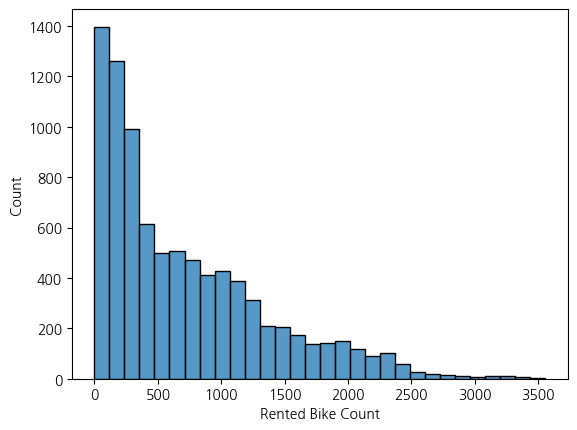

In [65]:
sns.histplot(df['Rented Bike Count'],bins=30) #좌측으로 치우친 형태지만, 대여 수 이므로 우측 데이터도 이상치가 아닌 것으로 판단.

> 계절별, 휴일 여부에 따른 분포

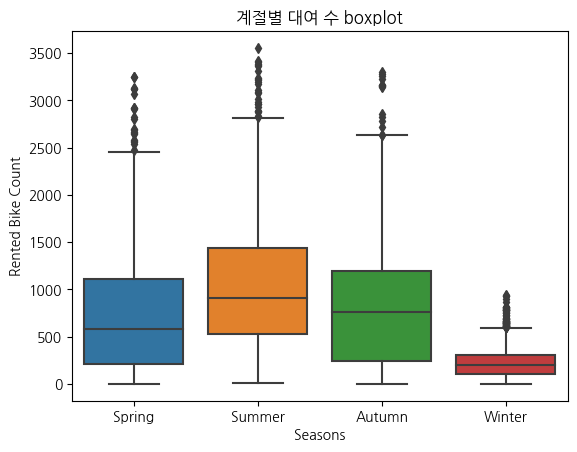

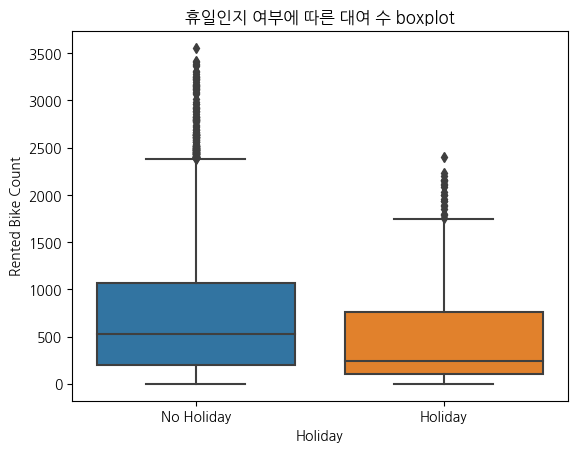

In [66]:
sns.boxplot(df.Seasons, df['Rented Bike Count'],order=["Spring", "Summer", "Autumn", "Winter"])
plt.title('계절별 대여 수 boxplot') 
plt.show() #계절별로 봤을 땐 겨울이 확실히 대여 수가 적은 것을 확인할 수 있음
sns.boxplot(df.Holiday,df['Rented Bike Count'])
plt.title('휴일인지 여부에 따른 대여 수 boxplot')
plt.show() #휴일보단 평일에 비교적 대여 수가 많음

> 시간대별, 요일별 분포

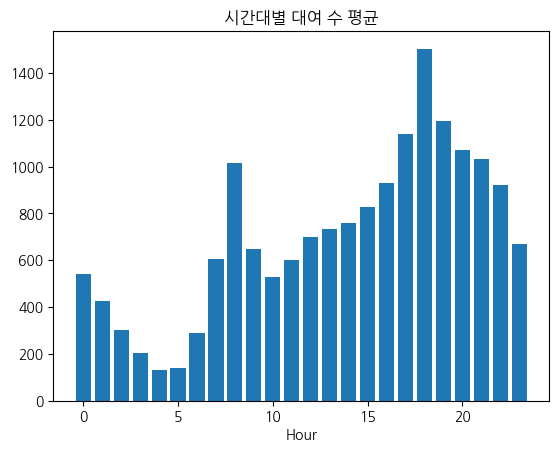

Text(0.5, 1.0, '요일별 대여 수 분포')

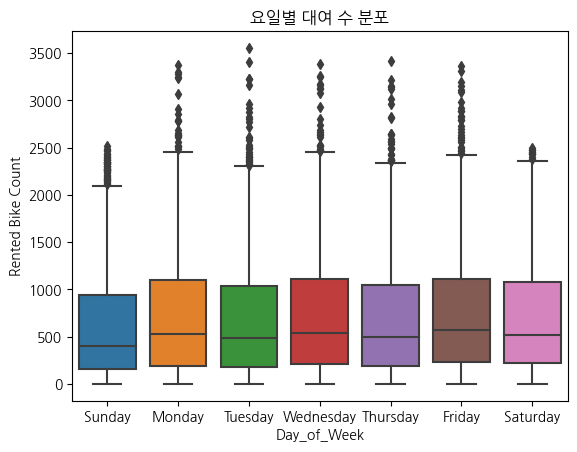

In [67]:
plt.bar(x = df.Hour.unique(), height = df.groupby('Hour')['Rented Bike Count'].mean()) #8시와 18시인 출퇴근 시간에 대여수가 높음
plt.xlabel('Hour')
plt.title('시간대별 대여 수 평균')
plt.show()
df['Day_of_Week'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.day_name() #요일변수 생성
sns.boxplot(x=df['Day_of_Week'], y='Rented Bike Count', data=df,order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('요일별 대여 수 분포') #일요일이 다른 요일에 비해 적다는것만 빼면 딱히 별거 없는듯
#df.drop('Day_of_Week', axis=1, inplace=True) 

### Temperature(°C), Dew point temperature(°C) 변수 확인

                           Temperature(°C)  Dew point temperature(°C)
Temperature(°C)                   1.000000                   0.913127
Dew point temperature(°C)         0.913127                   1.000000


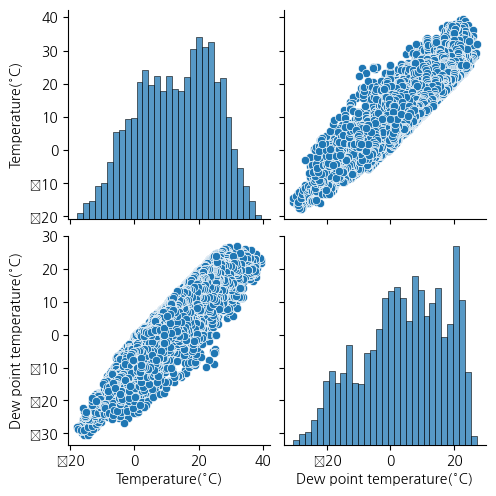

In [68]:
print(df[['Temperature(°C)', 'Dew point temperature(°C)']].corr())
sns.pairplot(df[['Temperature(°C)', 'Dew point temperature(°C)']]) #높은 상관계수를 보임

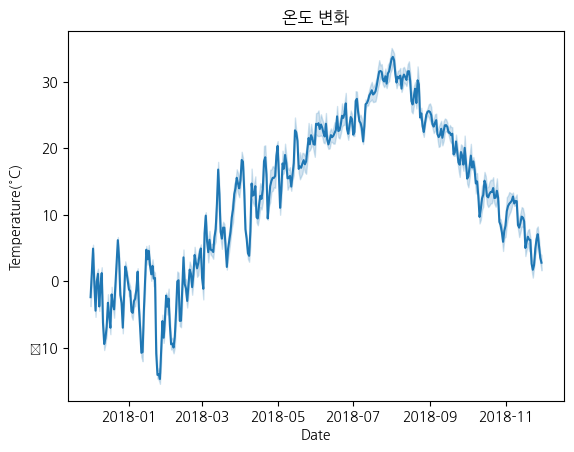

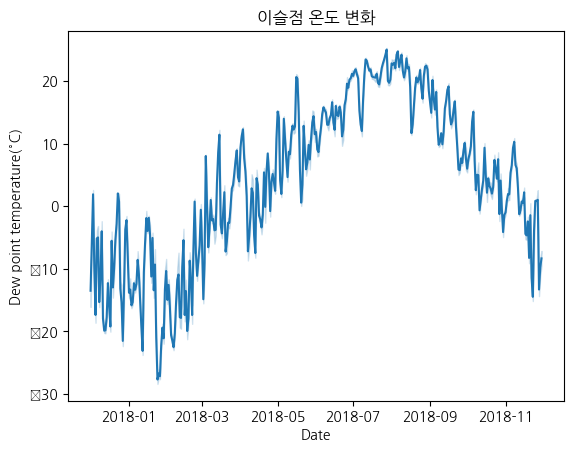

In [69]:
sns.lineplot(df.Date, df['Temperature(°C)'])
plt.title('온도 변화')
plt.show()
sns.lineplot(df.Date, df['Dew point temperature(°C)'])
plt.title('이슬점 온도 변화')
plt.show() #시간순으로 확인해봤을 때 8월쯤이 제일 높음 => 계절별 차이가 나타남

> 계절별 분포

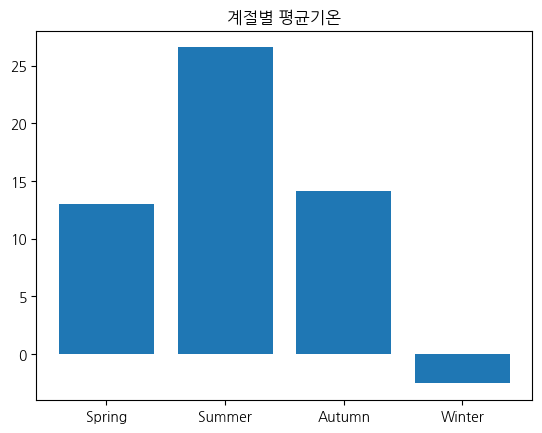

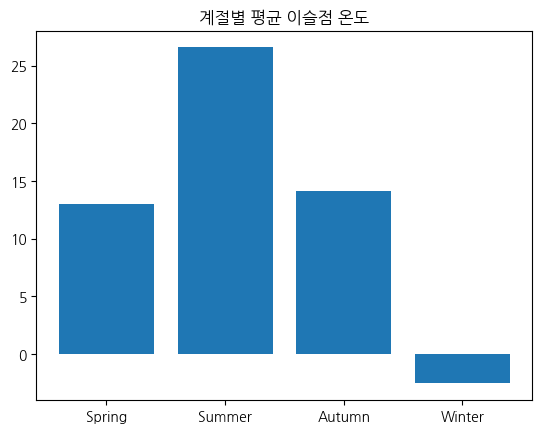

In [70]:
 #계절별 평균기온
seasons_mean = df.groupby('Seasons')['Temperature(°C)'].mean()
seasons_mean = seasons_mean.reindex(["Spring", "Summer", "Autumn", "Winter"])
plt.bar(seasons_mean.index,seasons_mean) #확연히 여름이 높고 겨울이 낮은 것을 확인할 수 있음
plt.title('계절별 평균기온')
plt.show()
seasons_mean2 = df.groupby('Seasons')['Dew point temperature(°C)'].mean()
seasons_mean2 = seasons_mean.reindex(["Spring", "Summer", "Autumn", "Winter"])
plt.bar(seasons_mean2.index,seasons_mean2)
plt.title('계절별 평균 이슬점 온도')
plt.show() #상관계수가 높은 이슬점 온도도 비슷한 형태를 보임

### Humidity(%): 습도, Rainfall(mm), Snowfall (cm) 변수

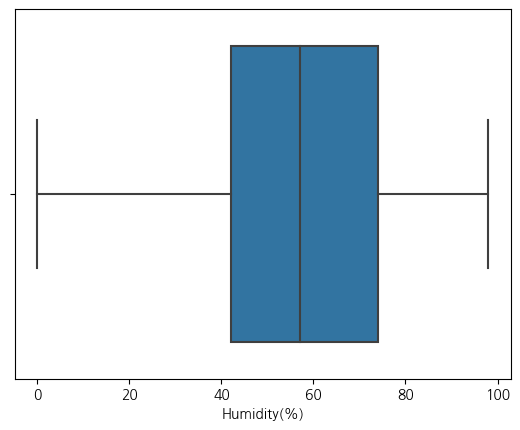

<AxesSubplot:xlabel='Humidity(%)', ylabel='Count'>

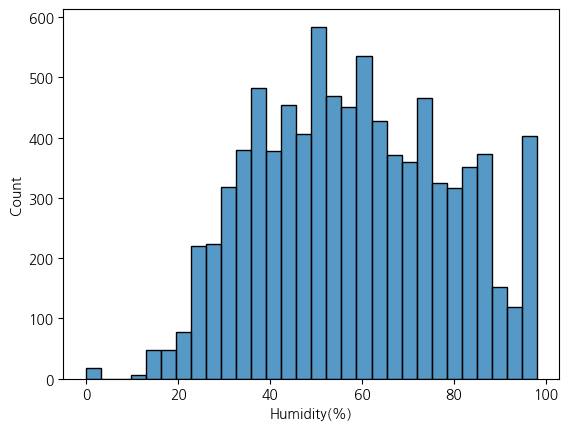

In [71]:
sns.boxplot(df['Humidity(%)'])
plt.show()
sns.histplot(df['Humidity(%)'],bins=30)

> 날씨 변수 추가(Clear, Rain, Snow, Cloudy)

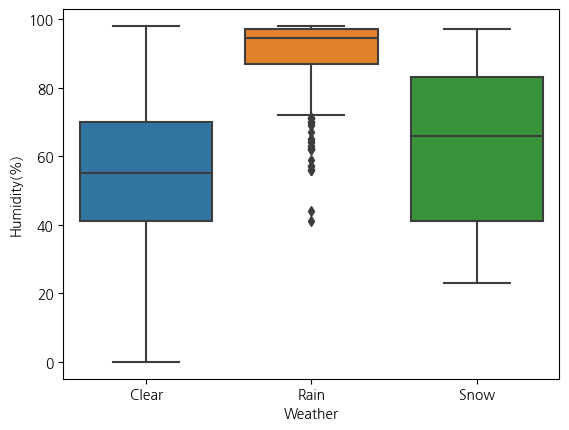

In [72]:
df['Weather'] = 'Clear' #Weather라는 변수 추가
df.loc[(df['Rainfall(mm)'] > 0), 'Weather'] = 'Rain'
df.loc[(df['Snowfall (cm)'] > 0), 'Weather'] = 'Snow' #비와 눈이 같이 온 날은 충분히 추운날이라고 판단, 눈으로 출력
sns.boxplot(x="Weather", y="Humidity(%)", data=df)
#df.drop('Weather', axis=1, inplace=True)
plt.show()

In [73]:
df.Weather.value_counts()

Clear    7817
Rain      500
Snow      443
Name: Weather, dtype: int64

### Visibility (10m), Solar Radiation (MJ/m2) 변수 확인

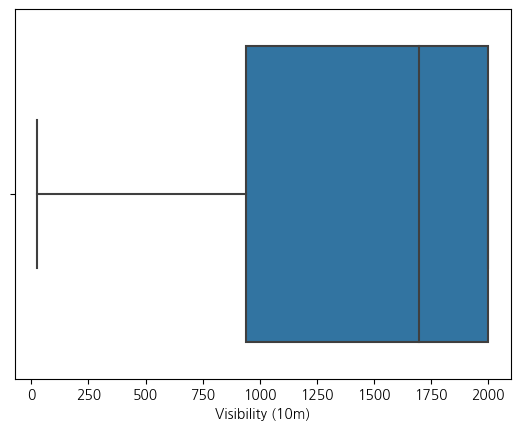

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)'>

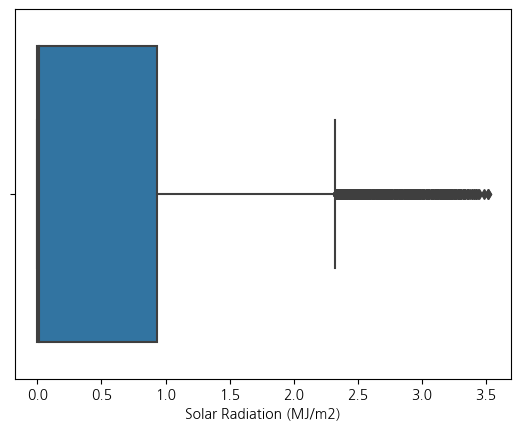

In [74]:
sns.boxplot(df['Visibility (10m)'])
plt.show()
sns.boxplot(df['Solar Radiation (MJ/m2)']) #평균이 거의 0에 가까움

> 시간대별 분포

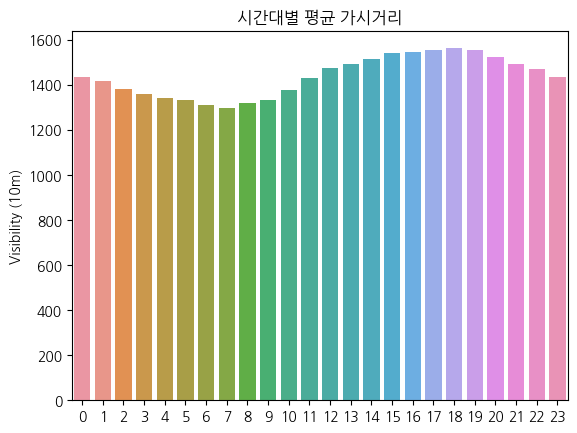

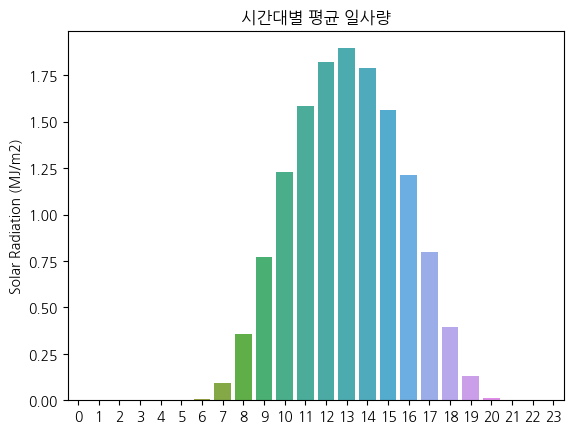

In [75]:
sns.barplot(df.Hour.unique(),df.groupby('Hour')['Visibility (10m)'].mean())
plt.title('시간대별 평균 가시거리')
plt.show()
sns.barplot(df.Hour.unique(),df.groupby('Hour')['Solar Radiation (MJ/m2)'].mean())
plt.title('시간대별 평균 일사량')
plt.show()

In [76]:
df.groupby('Hour')['Solar Radiation (MJ/m2)'].sum() ==0 #21시~오전 5시까지는 항상 밤이지만, 일출, 일몰시간에 영향을 받는 것으로 보임

Hour
0      True
1      True
2      True
3      True
4      True
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21     True
22     True
23     True
Name: Solar Radiation (MJ/m2), dtype: bool

> 시간대 + 계절별 Solar Radiation (MJ/m2)

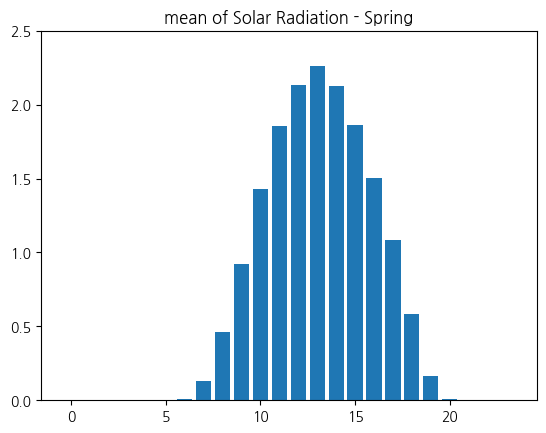

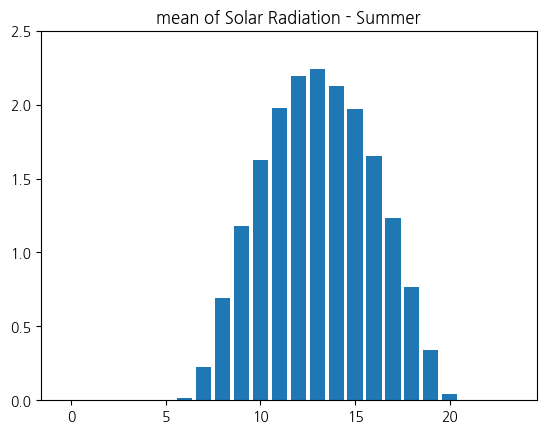

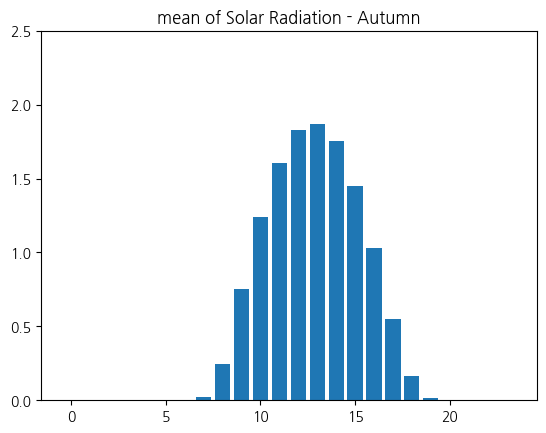

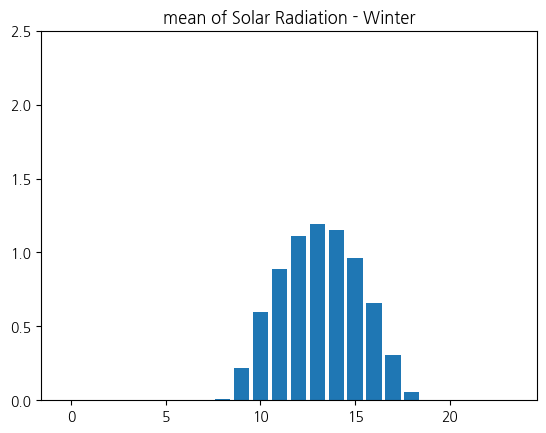

In [77]:
for i in [ 'Spring', 'Summer', 'Autumn','Winter']:
    plt.bar(df.Hour.unique(), df[df['Seasons']==i].groupby('Hour')['Solar Radiation (MJ/m2)'].mean())
    plt.title('mean of Solar Radiation - '+i)
    plt.ylim(0,2.5)
    plt.show() #여름이 겨울에 비해 폭, 양이 확연히 많음

> 날씨별 분포(날씨변수 만든김에)

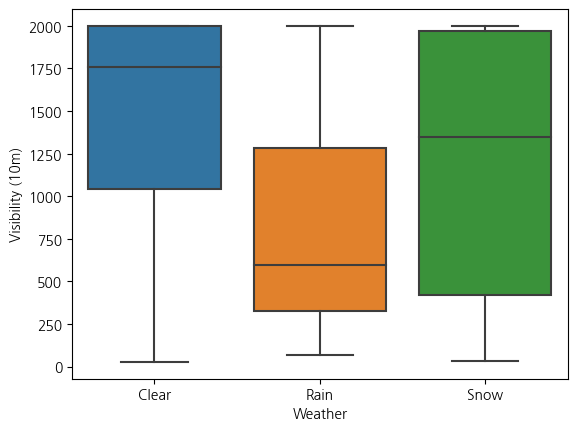

<AxesSubplot:xlabel='Weather', ylabel='Solar Radiation (MJ/m2)'>

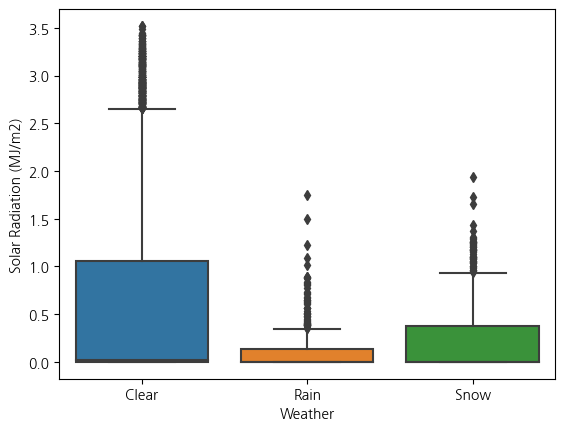

In [78]:
sns.boxplot(x="Weather", y="Visibility (10m)", data=df) #눈만 오는날은 가시거리에 큰 영향을 받지 않는듯
plt.show()
sns.boxplot(x="Weather", y="Solar Radiation (MJ/m2)", data=df) #확실히 눈이오는 날은 일사량이 매우 낮음


### 다른 변수들의 날씨별 분포확인

<AxesSubplot:xlabel='Weather', ylabel='Humidity(%)'>

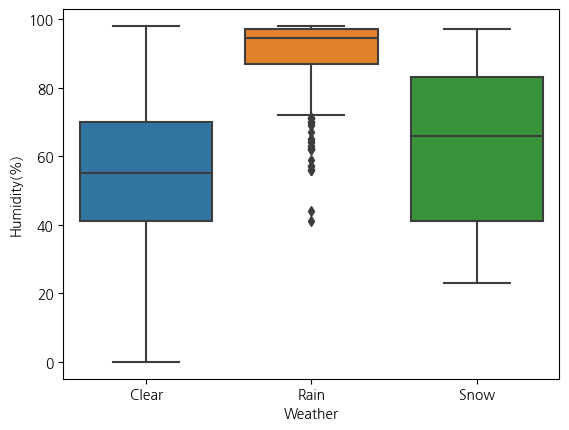

In [79]:
sns.boxplot(x="Weather", y="Humidity(%)", data=df) #확실히 비오는날 습도가 높고, 눈이 오는 날은 습도에 큰영향 x

<AxesSubplot:xlabel='Weather', ylabel='Rented Bike Count'>

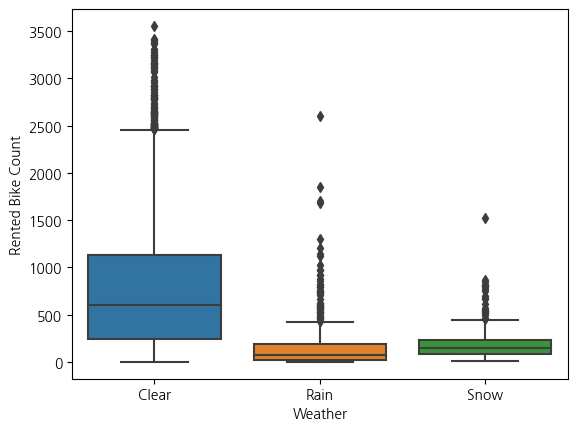

In [80]:
sns.boxplot(x="Weather", y="Rented Bike Count", data=df) #맑은날에 확실히 대여량이 많음

### Wind speed (m/s) 변수 확인

<AxesSubplot:xlabel='Wind speed (m/s)'>

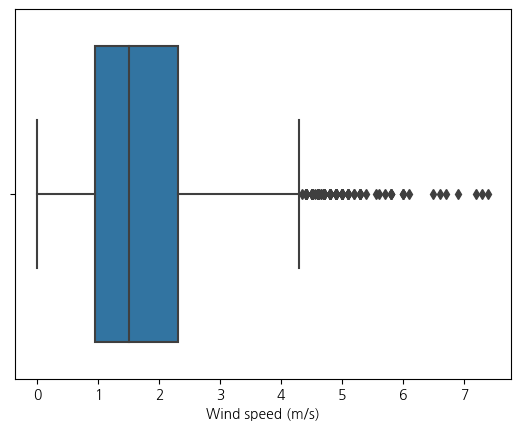

In [81]:
sns.boxplot(df['Wind speed (m/s)'])

> 시간대별

<AxesSubplot:ylabel='Wind speed (m/s)'>

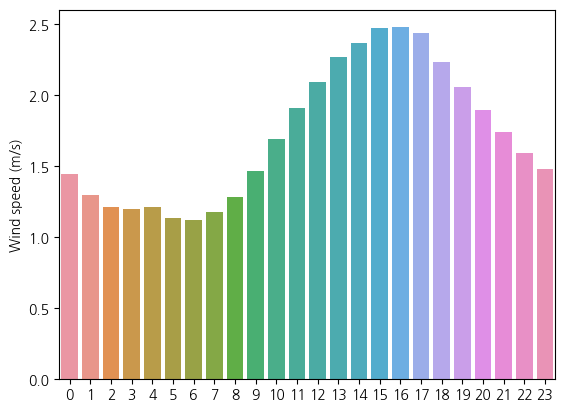

In [82]:
sns.barplot(df.Hour.unique(),df.groupby('Hour')['Wind speed (m/s)'].mean())

<AxesSubplot:ylabel='Wind speed (m/s)'>

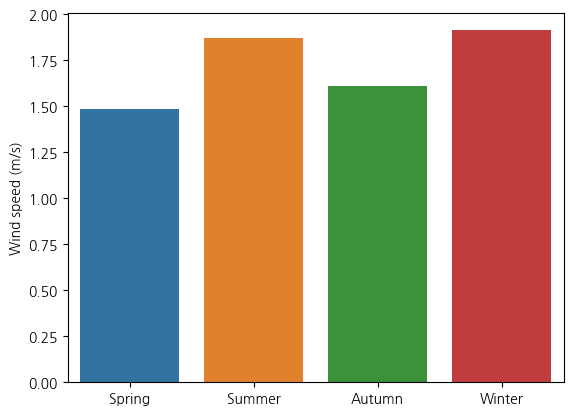

In [83]:
Wind_seasons_mean = df.groupby('Seasons')['Wind speed (m/s)'].mean()
Wind_seasons_mean.reindex(["Spring", "Summer", "Autumn", "Winter"])
sns.barplot(["Spring", "Summer", "Autumn", "Winter"],Wind_seasons_mean) #여름과 겨울에 바람이 강하게 붊

### 추가로 모델에 학습시키고, 정확도를 높이기 위해 스케일링, 인코딩, 로그변환 등의 전처리 가능
(데이터 프레임을 수정하지 않고 일단 결과만 출력), 이상치 탐지는 아직 조금 어려워요...

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

> 좌측으로 치우쳤던 Rented Bike Count 로그변환

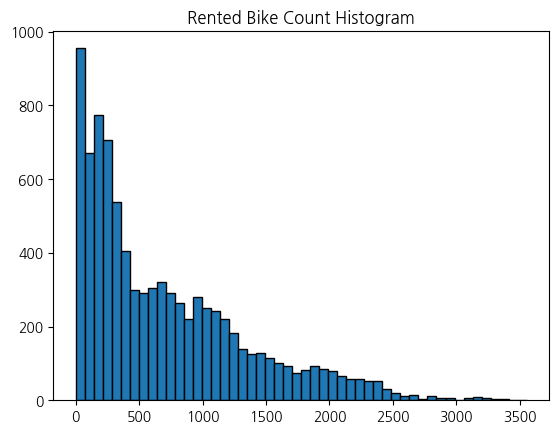

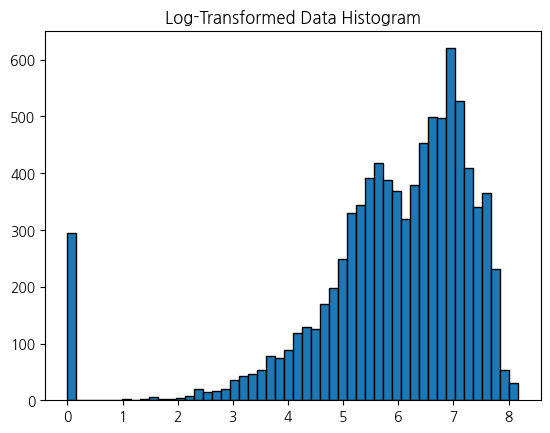

In [86]:
plt.hist(df['Rented Bike Count'], bins=50, edgecolor='black')
plt.title('Rented Bike Count Histogram')
plt.show()

# 로그 변환
log_transformed_data = np.log1p(df['Rented Bike Count']) 

plt.hist(log_transformed_data, bins=50, edgecolor='black')
plt.title('Log-Transformed Data Histogram')
plt.show() #이번엔 우측으로 치우친거같기도..

> 문자형변수 인코딩: Seasons, Holiday, Functioning Day, Day_of_Week, Weather

In [90]:
#원-핫 인코딩 적용가능
display(pd.get_dummies(df['Seasons']))
display(pd.get_dummies(df['Holiday']))
display(pd.get_dummies(df['Functioning Day']))
display(pd.get_dummies(df['Day_of_Week']))
display(pd.get_dummies(df['Weather']))

,Autumn,Spring,Summer,Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8755,1,0,0,0
8756,1,0,0,0
8757,1,0,0,0
8758,1,0,0,0


,Holiday,No Holiday
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
8755,0,1
8756,0,1
8757,0,1
8758,0,1


,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
8755,0,1
8756,0,1
8757,0,1
8758,0,1


,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
8755,1,0,0,0,0,0,0
8756,1,0,0,0,0,0,0
8757,1,0,0,0,0,0,0
8758,1,0,0,0,0,0,0


,Clear,Rain,Snow
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
8755,1,0,0
8756,1,0,0
8757,1,0,0
8758,1,0,0
